In [29]:
import numpy as np
import cv2 as cv
from numpy import cos, sin
from astropy.io import fits
from astropy import units,constants
from matplotlib import pyplot as plt

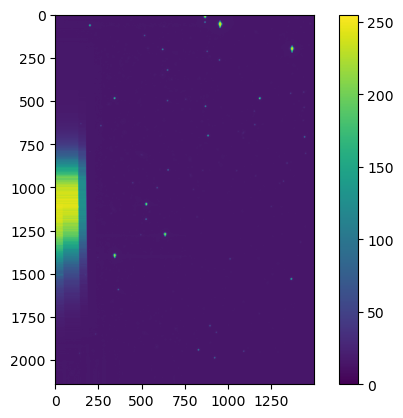

In [3]:
# coadd_DESJ2125-6504_g
g_band_full = fits.open('dataset/coadd_DESJ2125-6504_g.fits')
g_band_full_image = g_band_full[0].data
g_band_full_image = (g_band_full_image - g_band_full_image.min())/(g_band_full_image.max()-g_band_full_image.min())*255
plt.imshow(g_band_full_image)
plt.colorbar()

50 50


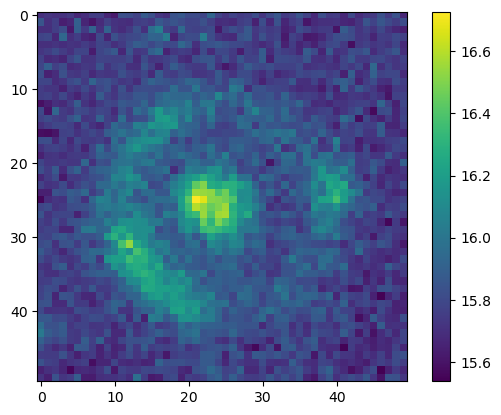

In [4]:
g_band_lens = g_band_full_image[795:845, 950:1000]
plt.imshow(g_band_lens)
plt.colorbar()
w, h = g_band_lens.shape[::-1]
print(w, h)

/var/folders/1y/qhrcc8cj37584sr0mdy83jtr0000gp/T/ipykernel_64125/1969876983.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(i_band_full_image))


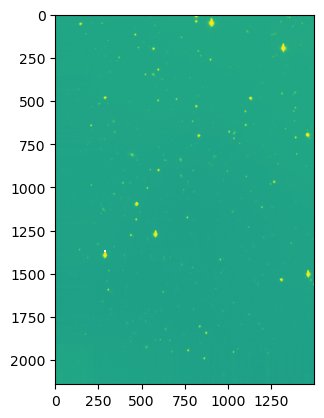

In [5]:
# coadd_DESJ2125-6504_i
i_band_full = fits.open('dataset/coadd_DESJ2125-6504_i.fits')
i_band_full_image = np.log(i_band_full[0].data)
i_band_full_image = (i_band_full_image - i_band_full_image.min())/(i_band_full_image.max()-i_band_full_image.min())*255
plt.imshow(np.log(i_band_full_image))

In [6]:
# method
method =cv.TM_CCOEFF_NORMED

img = i_band_full_image.copy()

# Apply template Matching
res = cv.matchTemplate(img,g_band_lens,method)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
threshold = 2
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv.rectangle(g_band_full_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

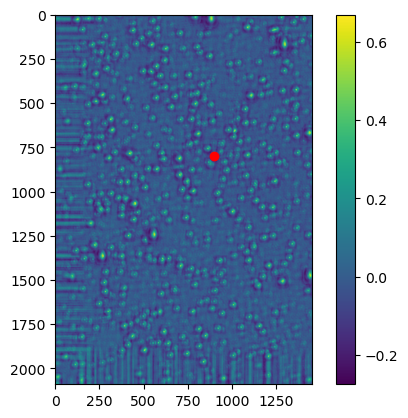

In [7]:
plt.imshow(res)
plt.colorbar()
plt.scatter(*max_loc,color='r')

In [8]:
cv.minMaxLoc(res)

(-0.27447769045829773, 0.6693097949028015, (771, 0), (897, 798))

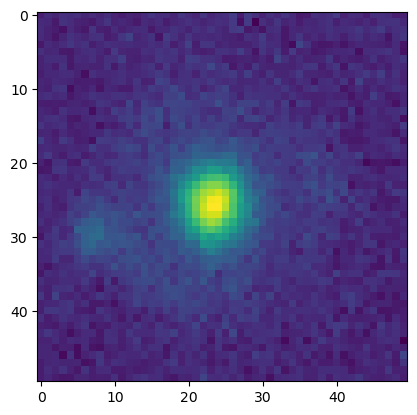

In [9]:
i_band_lens = i_band_full_image[max_loc[1]:max_loc[1]+h,max_loc[0]:max_loc[0]+w]
plt.imshow(np.log(i_band_lens))

/var/folders/1y/qhrcc8cj37584sr0mdy83jtr0000gp/T/ipykernel_64125/4135407189.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(r_band_full_image))


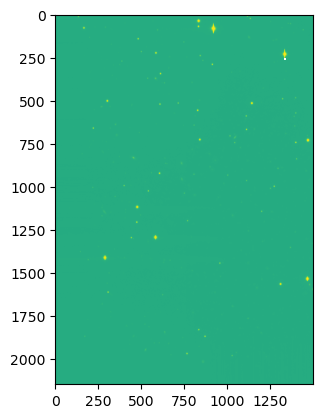

In [10]:
r_band_full = fits.open('dataset/coadd_DESJ2125-6504_r.fits')
r_band_full_image = r_band_full[0].data
r_band_full_image = (r_band_full_image - r_band_full_image.min())/(r_band_full_image.max()-r_band_full_image.min())*255

plt.imshow(np.log(r_band_full_image))

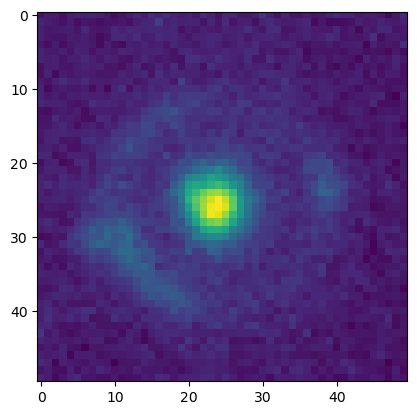

In [11]:
# method
method =cv.TM_CCOEFF_NORMED

img = r_band_full_image.copy()

# Apply template Matching
res = cv.matchTemplate(img,g_band_lens,method)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
threshold = 2
loc = np.where( res >= threshold)
r_band_lens = r_band_full_image[max_loc[1]:max_loc[1]+h,max_loc[0]:max_loc[0]+w]
plt.imshow(np.log(r_band_lens))

/var/folders/1y/qhrcc8cj37584sr0mdy83jtr0000gp/T/ipykernel_64125/3821884129.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(131)


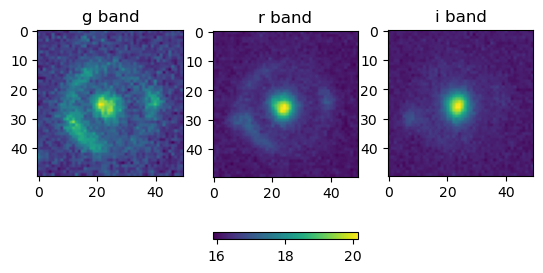

In [28]:
fig, ax = plt.subplots()

ax1 = plt.subplot(131)
img1 = ax1.imshow(g_band_lens)
plt.title("g band")

ax1 = plt.subplot(132)
img2 = ax1.imshow(r_band_lens)
plt.title("r band")

ax1 = plt.subplot(133)
img3 = ax1.imshow(i_band_lens)
plt.title("i band")

cb = fig.colorbar(img2, orientation='horizontal', )
plt.show()

In [13]:
rgi_lens = np.stack([g_band_lens,r_band_lens,i_band_lens])
rgi_lens.resize((50,50,3))